# Compare the reduced spectra with HI4PI
#### 1/11/22 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
from astropy.io import fits
%matplotlib inline

In [2]:
# customize plots
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth'] = 2

### code

In [4]:
path = '/Users/jpw/G/21cm_telescope/HI4PI/'
os.chdir(path)
f = glob.glob('spectrum*.txt')
nf = len(f)
lon = np.asarray([int(f[i][12:].split('.')[0]) for i in range(nf)])
isort = np.argsort(lon)

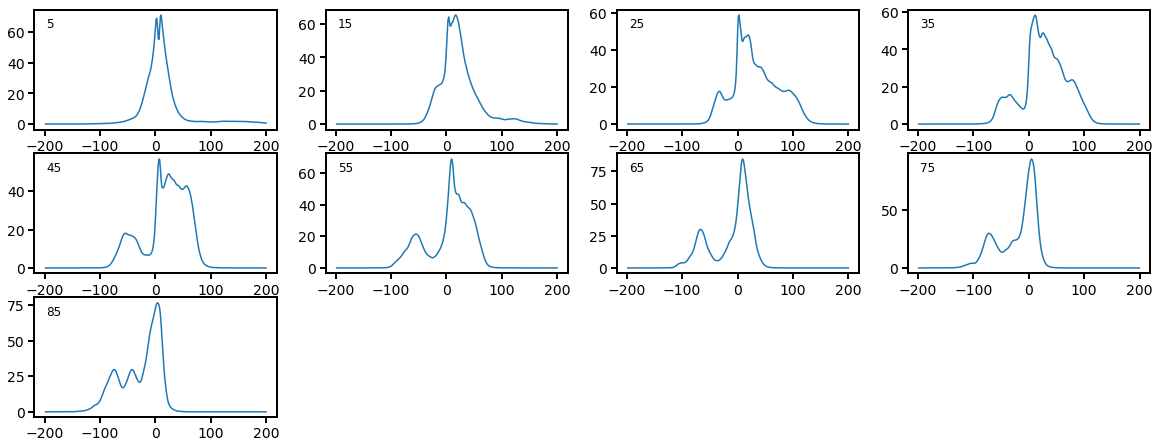

In [5]:
# plot the HI4PI spectra in order of increasing longitude

nx = 4
ny = math.ceil(nf/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i in range(nf):
    j = isort[i]
    ax = fig.add_subplot(ny, nx, i+1)
    v, T = np.loadtxt(f[j], unpack=True)
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(lon[j]), fontsize=12, transform=ax.transAxes)

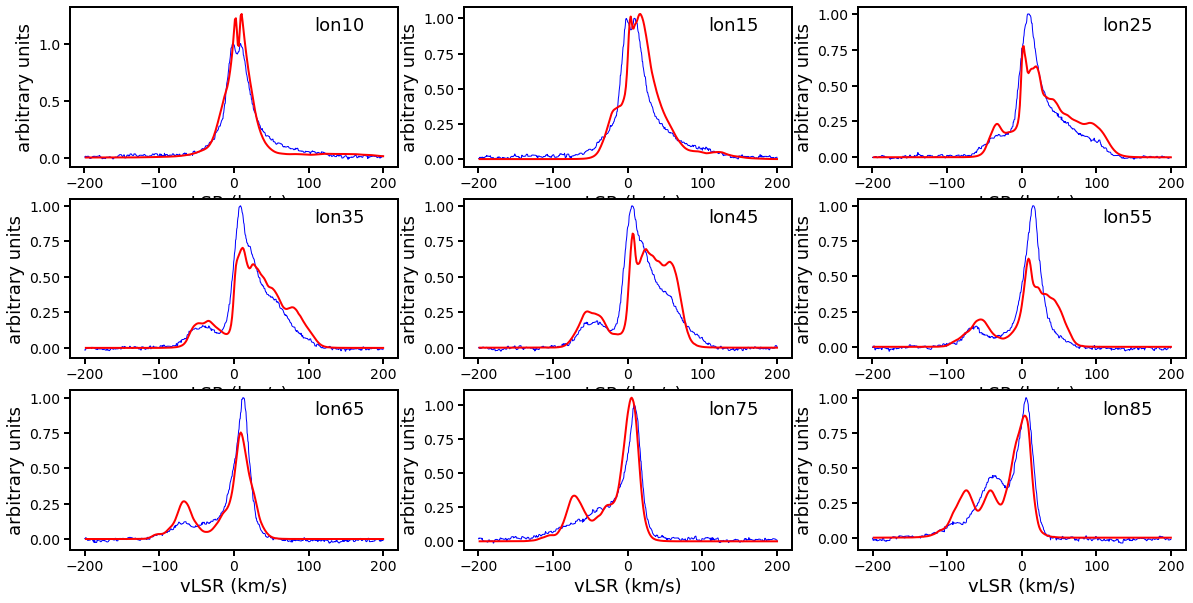

In [16]:
# overplot the team2 data (by hand as its nearest neighbor and a rough comparison at this point)

rpath = '/Users/jpw/NG/HI/data/airspy_spectra/reduced_spectra/'
fr =    ['lon10', 'lon15', 'lon25', 'lon35', 'lon45', 'lon55', 'lon65', 'lon75', 'lon85']
fcomp = [ 'lon5', 'lon15', 'lon25', 'lon35', 'lon45', 'lon55', 'lon65', 'lon75', 'lon85']

nx = 3
ny = math.ceil(len(fr)/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i, f in enumerate(fr):
    ax = fig.add_subplot(ny, nx, i+1)
    v, T = np.genfromtxt(rpath+f+'_reduced.csv', delimiter=',', unpack=True)
    vHI, THI = np.loadtxt('spectrum_'+fcomp[i]+'.txt', unpack=True)
    
    crop = (v > -200) & (v < 200)
    v = v[crop]
    T = T[crop]
    Tnorm = T/np.trapz(T,v)
    S = 1/max(Tnorm)
    ax.plot(v, S*Tnorm, 'b-', lw=1)
    
    ax.plot(vHI, S*THI/np.trapz(THI,vHI), 'r-', lw=2)
    ax.set_xlabel('vLSR (km/s)')
    ax.set_ylabel('arbitrary units')
    ax.text(0.9, 0.85, f, fontsize=18, ha='right', transform=ax.transAxes)

plt.savefig(rpath+'HI4PI_comparison.png', dpi=300)